In [2]:
from calibrationFunctions import openFiles, calculateForce, calculateTetherExtension, findTetheredBeads
import matplotlib.pyplot as plt
import numpy as np

In [5]:
folderPath = r"C:\Users\Perkins Lab\Desktop\Caleb Maddry\MT Data Analysis\Magnetic-Tweezers\Data\December\19\arnulfMT"

dataFrame = openFiles(folderPath, numRef=3, numExp=1, fps=400)

lowForce = []

for index in dataFrame.itertuples():
    if dataFrame['linearMotor'][index[0]] <= 15: lowForce = lowForce + [index[0]]
    if index[0] % 50000 == 0: print("Finding the low force points") 

Using: C:\Users\Perkins Lab\Desktop\Caleb Maddry\MT Data Analysis\Magnetic-Tweezers\Data\December\19\arnulfMT
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points


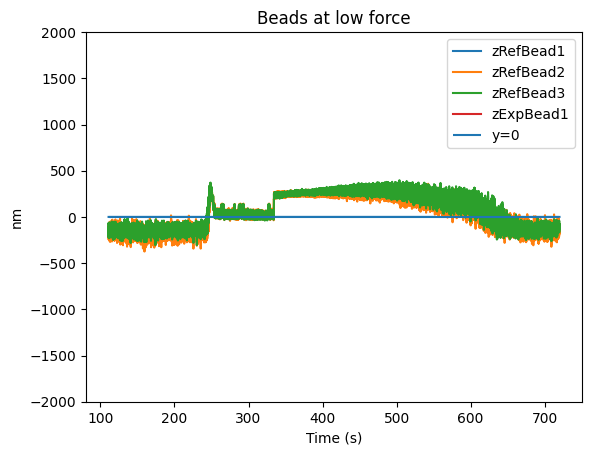

For RefBead2:
	The low force x-variance is: 12598.826864689485
	The low force y-variance is: 26708.199157327035
	The low force z-variance is: 157761.00092036978
For RefBead3:
	The low force x-variance is: 7434.080407707258
	The low force y-variance is: 16604.92310834777
	The low force z-variance is: 154955.46505940732


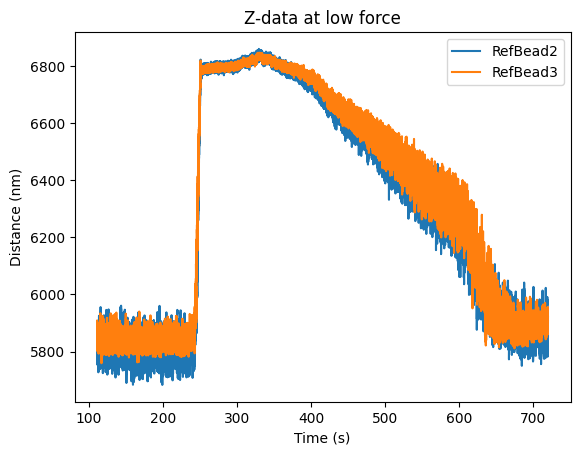

The glass position is:  -354.7086666666665
The glass position is:  -286.523


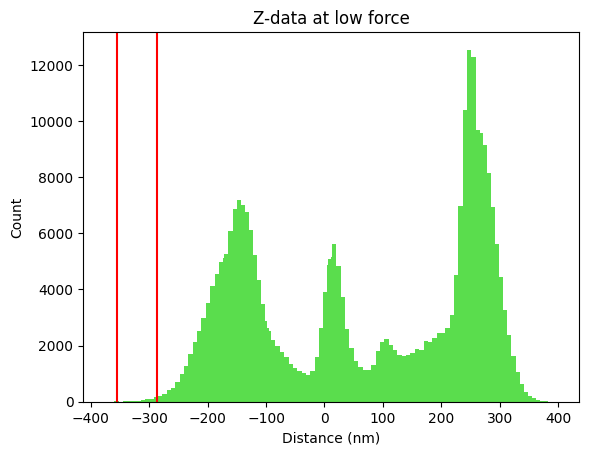

In [7]:
lowForceIdx = [min(lowForce), max(lowForce)]

tetherBeads = findTetheredBeads(dataFrame, lowForceIdx); 
dataFrame = calculateTetherExtension(dataFrame, tetherBeads, lowForceIdx); 

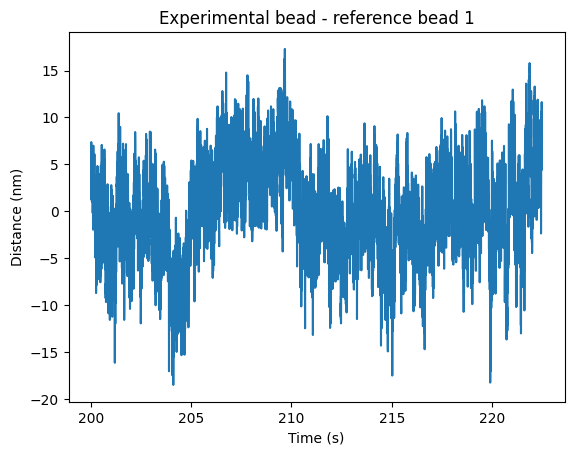

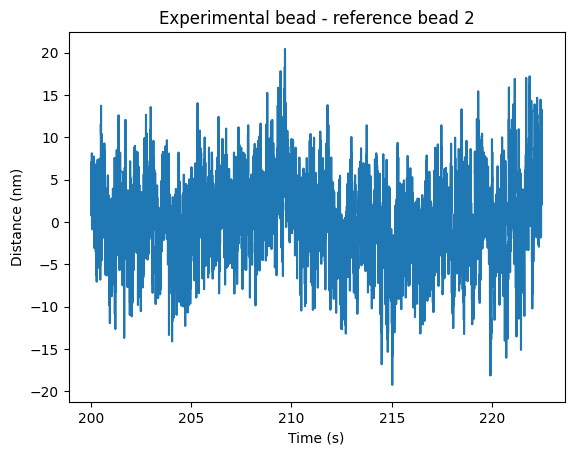

In [42]:
xData1 = dataFrame["xRefBead3"] - dataFrame["xExpBead1"]
xData2 = dataFrame["xRefBead1"] - dataFrame["xExpBead1"]

yData1 = dataFrame["yRefBead3"] - dataFrame["yExpBead1"]
yData2 = dataFrame["yRefBead1"] - dataFrame["yExpBead1"]

zData1 = dataFrame["zRefBead1"] - dataFrame["zExpBead1"]
zData2 = dataFrame["zRefBead2"] - dataFrame["zExpBead1"]

zMotor = dataFrame["linearMotor"]

highForceStart = 0; 
highForceEnd = 7400; 

medForceStart = 11000
medForceEnd = 27000

lowForceStart = 80000
lowForceEnd = 89000

plt.plot(dataFrame["timeVector"][lowForceStart:lowForceEnd], zData1[lowForceStart:lowForceEnd] - np.mean(zData1[lowForceStart:lowForceEnd]))
plt.xlabel("Time (s)")
plt.ylabel("Distance (nm)")
plt.title("Experimental bead - reference bead 1")
plt.show()

plt.plot(dataFrame["timeVector"][lowForceStart:lowForceEnd], zData2[lowForceStart:lowForceEnd] - np.mean(zData2[lowForceStart:lowForceEnd]))
plt.xlabel("Time (s)")
plt.ylabel("Distance (nm)")
plt.title("Experimental bead - reference bead 2")
plt.show()




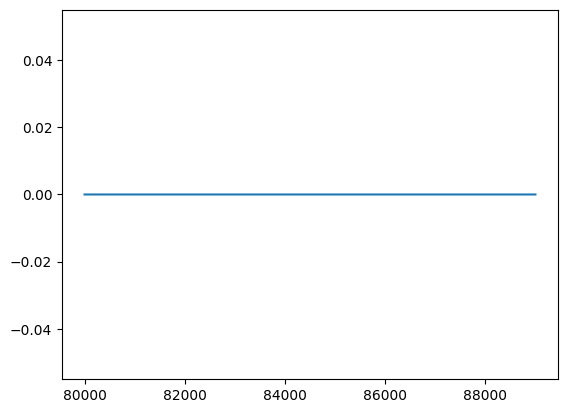

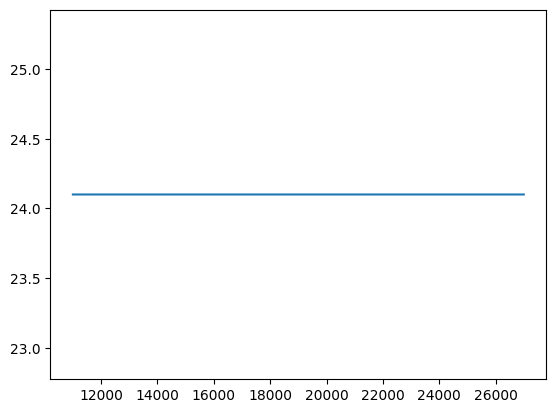

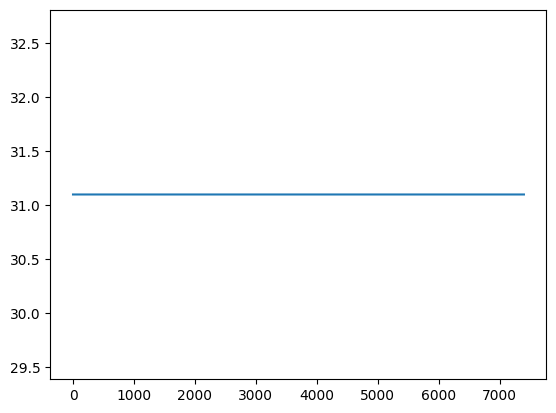

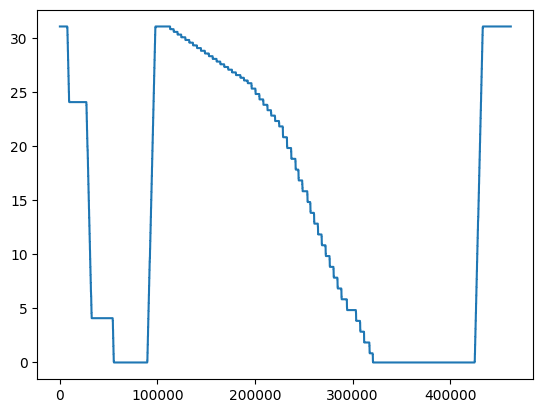

31.099960000000003

In [36]:
plt.plot(zMotor[lowForceStart:lowForceEnd])
plt.show()

plt.plot(zMotor[medForceStart:medForceEnd])
plt.show()

plt.plot(zMotor[highForceStart:highForceEnd])
plt.show()

plt.plot(zMotor)
plt.show()

np.mean(zMotor[highForceStart:highForceEnd])